In [123]:
from ucimlrepo import fetch_ucirepo, list_available_datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


# Read the data
adult = pd.read_csv('adult/adult.data', header=None)
adult.info()
adult_test = pd.read_csv('adult/adult.test', header=None)
adult_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       32561 non-null  int64 
 1   1       32561 non-null  object
 2   2       32561 non-null  int64 
 3   3       32561 non-null  object
 4   4       32561 non-null  int64 
 5   5       32561 non-null  object
 6   6       32561 non-null  object
 7   7       32561 non-null  object
 8   8       32561 non-null  object
 9   9       32561 non-null  object
 10  10      32561 non-null  int64 
 11  11      32561 non-null  int64 
 12  12      32561 non-null  int64 
 13  13      32561 non-null  object
 14  14      32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       16281 non-null  int64 
 1   1      

In [124]:
# Clean the training data
adult = adult.replace(' ?', np.nan)
adult_cleaned = adult.dropna()

# Clean the testing data 
adult_test = adult_test.replace(' ?', np.nan)
cleaned_test = adult_test.dropna()

In [125]:
# Assign column names to the DataFrame
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 
                'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
                'native-country', 'income']
adult_cleaned.columns = column_names
adult_cleaned.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [126]:
# Prepare features (X) and encode categorical variables
categorical_columns = adult_cleaned.select_dtypes(include=['object']).columns

# One-hot encode the categorical columns
adult_encoded = pd.get_dummies(adult_cleaned, columns=categorical_columns)

# Prepare the target variable
X = adult_encoded.drop(columns=['income_ <=50K', 'income_ >50K'])
y = (adult_cleaned['income'].str.strip() == '>50K').astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, 
                          target_names=['<=50K', '>50K']))

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.90      4503
        >50K       0.75      0.58      0.65      1530

    accuracy                           0.84      6033
   macro avg       0.81      0.76      0.78      6033
weighted avg       0.84      0.84      0.84      6033



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


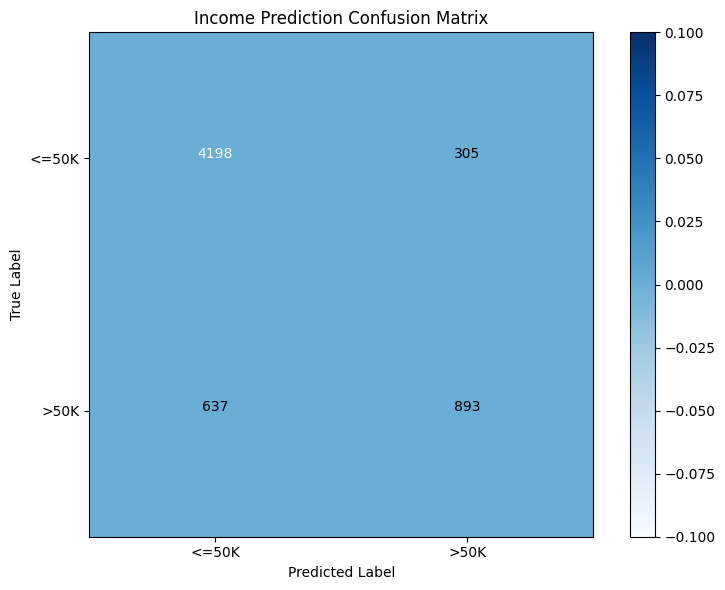

In [129]:
# Create basic confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(np.zeros_like(cm), cmap='Blues', interpolation='nearest')
plt.title('Income Prediction Confusion Matrix')
plt.colorbar()

# Add labels
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations
thresh = cm.max() / 2
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()

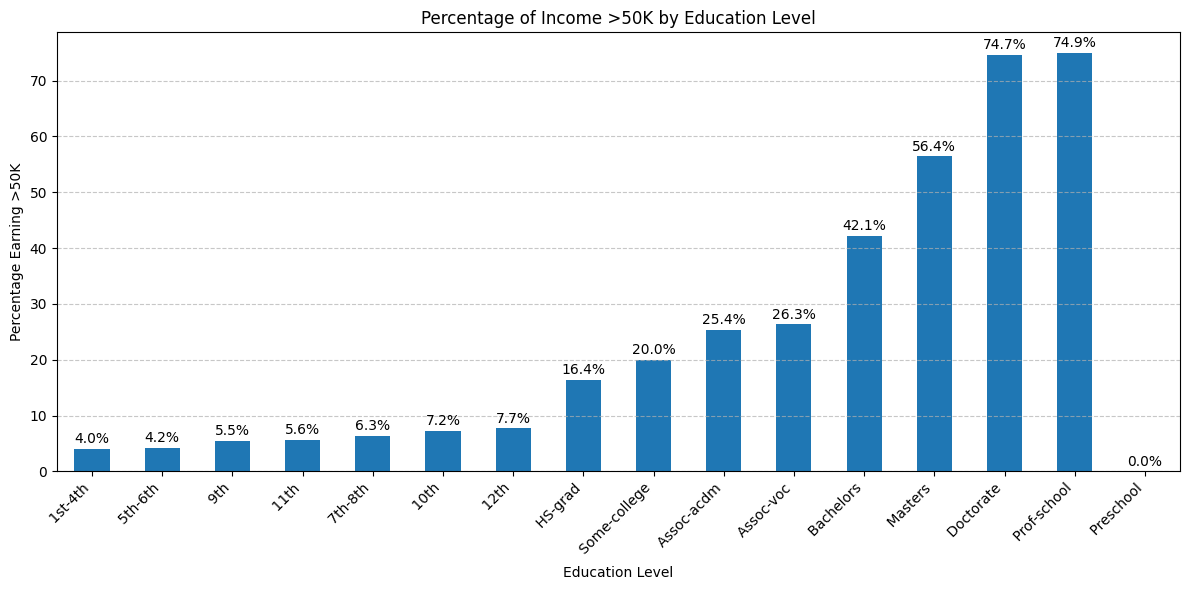

In [ ]:
# Create education level income distribution
education_income = adult_cleaned.groupby(['education', 'income']).size().unstack()

# Calculate percentage of >50K for each education level
education_income['pct_over_50k'] = (education_income[' >50K'] / 
                                   (education_income[' >50K'] + education_income[' <=50K'])) * 100

# Create bar plot
plt.figure(figsize=(12, 6))
bars = education_income['pct_over_50k'].sort_values().plot(kind='bar')
plt.title('Percentage of Income >50K by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Percentage Earning >50K')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels with better positioning
for bar in bars.patches:
    # Get the height of each bar
    height = bar.get_height()
    # Add text at the top of each bar (slightly offset)
    plt.text(
        bar.get_x() + bar.get_width()/2,  # x position (center of bar)
        height + 0.5,                      # y position (slightly above bar)
        f'{height:.1f}%',                  # text (percentage with 1 decimal)
        ha='center',                       # horizontal alignment
        va='bottom'                        # vertical alignment
    )

plt.tight_layout()
plt.show()

In [ ]:
##########################################
########## Random Forest Model ###########
##########################################


from sklearn.ensemble import RandomForestClassifier

# Use the previously prepared X and y data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, 
                                 random_state=42, 
                                 max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, 
                          target_names=['<=50K', '>50K']))

Random Forest Classification Report:
              precision    recall  f1-score   support

       <=50K       0.87      0.96      0.91      4503
        >50K       0.82      0.56      0.67      1530

    accuracy                           0.86      6033
   macro avg       0.84      0.76      0.79      6033
weighted avg       0.85      0.86      0.85      6033



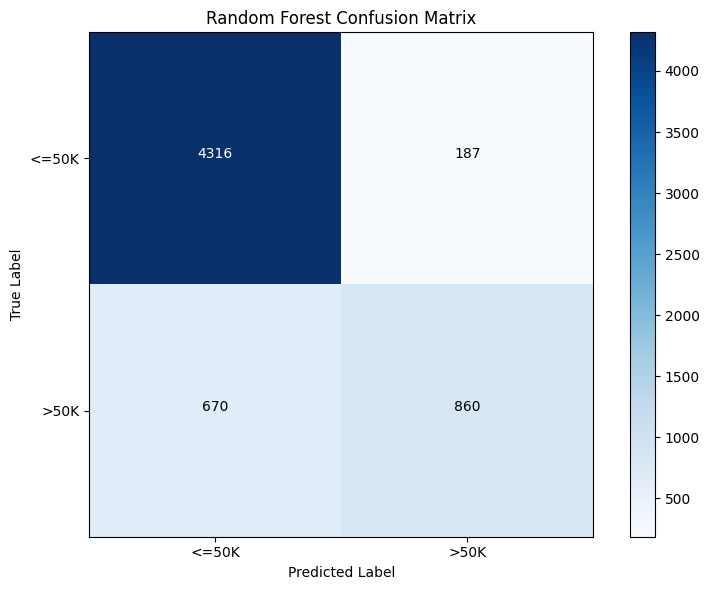

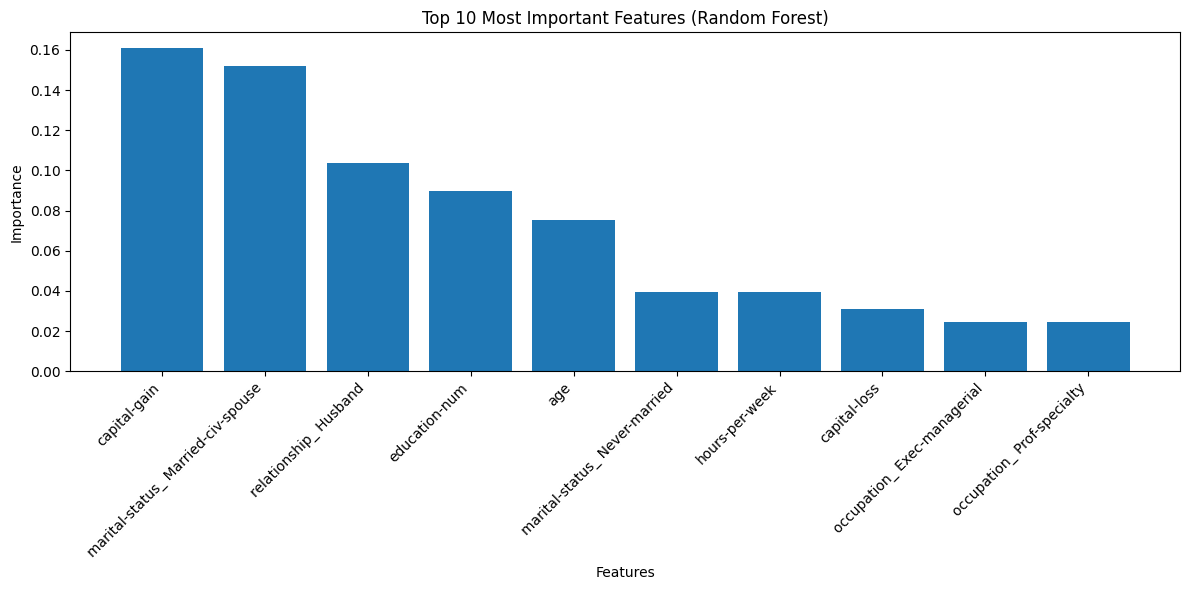

In [ ]:
# Create confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()

# Add labels
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['<=50K', '>50K'])
plt.yticks(tick_marks, ['<=50K', '>50K'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Add text annotations
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.tight_layout()
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(range(10), feature_importance['importance'][:10])
plt.xticks(range(10), feature_importance['feature'][:10], rotation=45, ha='right')
plt.title('Top 10 Most Important Features (Random Forest)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
random_forest_error_rate = np.mean(y_pred_rf != y_test)
print(f'Random Forest Error Rate: {random_forest_error_rate:.2f}')

logistic_regression_error_rate = np.mean(y_pred != y_test)
print(f'Logistic Regression Error Rate: {logistic_regression_error_rate:.2f}')


Random Forest Error Rate: 0.14
Logistic Regression Error Rate: 0.16
